# Sell Sell Sell!

**Important:** Please rename this file to *yourStudentNumber*.ipynb 

You are looking to sell a few items on Done Deal so you take a few pictures. In order to give a sense of scale, you show all the objects to the right of a 10 cm long row of staples.

Specification:
Write a program to extract the dimensions of each object automatically, given the staples are 10 cm long.

Tips:
1. Create a binary mask from the image using thresholding or edge detection;
2. Extract the contours in the binary image;
3. Sort the contours by area so that the first two contours are the largest;
4. Identify which of these is the left contour (staples) and which is the right (object);
5. Place a bounding rectangle around each and extract their dimensions in pixels;
6. Using the fact that the long edge of the staples is 10 cm, convert these pixel measurements to cm;
7. Feedback the actual dimensions to the user as _____ cm x _____ cm

Your design should work on the attached image but also on similar images (photos taken against white paper). 

Refer to the General Assignment Guidelines to maximise your marks.

As with anything you submit, this must be your own work and as such, it must not be similar to any other work, including other students' submissions, previous years' submissions or material found online. Any excessively similar submission will receive a zero mark.

Submit a single Jupyter Notebook (.ipynb) file here on Brightspace.

## Algorithm Explained

##### Import and Colourspace
1. The first step is importing the image, and changing the colourspace to RGB to make it easier to work with.
2. The next step is to convert the image to grayscale. This is necessary for the processing steps that come after.

##### Magnitude
3. After this, it gets the rate of change of the pixel values of the image, up/down and right/left, using the Sobel function.
4. Combining these two rate of change images gives us the image magnitude, which highlights which parts of the image have the steepest changes.

##### Threshold
5. Using a threshold on this magnitude image shows clearly the outlines of the two objects by reducing all values to either black or white.


##### Contours
6. Next, the algorithm uses CV2's built-in contour finding function to get a list of all the contours in the image.
7. It then sorts them by their area or size, giving a list where the first two elements are the biggest contours, i.e. the staples and the object.
8. Then it generates two completely blank black images of the size of the original image, to draw the contours onto.
9. The program then draws these two contours out onto two seperate images, giving us one outline for the staples, and one for the object.


##### Deciding Left vs Right Parts
10. Next, it determines which of the two is the left (staples) and right (object)
11. If the rightmost part of the first contour is in the right-hand half of the image, and the leftmost part is in the rightmost 3/4, then this is designated the RIGHT item, or the object.
12. Otherwise, it is designated the LEFT item, or the staples. The other contour is then designated to be the other item.

##### Bounding Rectangles
13. Next, the program uses a for loop to operate on the two images one after another. It gets the bounds of the items in each of their images and draws a rectangle around them.
14. This bounding rectangle represents the total width and total height of the staples, and of the object, in their two images.
15. Next, it crops the images to the sizes of the boundary rectangles, allowing it to then easily extract the width and height of each using cv2.shape.

##### Measuring Object
16. Once it has the width and height of both bounding rectangles, it figures out whether the height or width of the staples is longer, and designates this as the Long Edge.
17. Knowing that the Long Edge is 10cm long, it divides the pixel number by 10 to get pixels per centimeter.
18. Then it divides the height and width of the object in pixels to get a centimeter width and height.

##### Generating Return Image
19. The function then assigns the image showing the boundary box of the object being measured as the Return Image, as the contract says "show the bounding box of the object on the image".
20. After this, it then uses the cv2.putText function to add text describing the width and height of the object to the image.
21. Finally, it then returns the image displaying the bounding rectangle and text showing the object height and width.



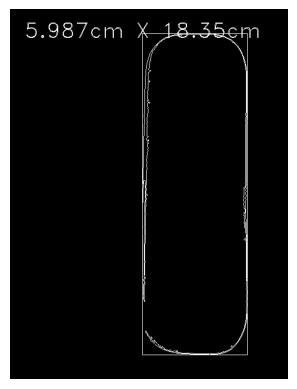

(np.float64(-0.5), np.float64(489.5), np.float64(652.5), np.float64(-0.5))

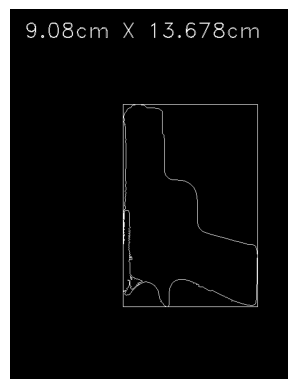

In [ ]:
import cv2 as cv2
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import image as image

def get_dimensions(image_path):

    # Import and Colourspace
    I = cv2.imread(image_path)
    width = 0
    height = 0

    grayScale = cv2.cvtColor(I, cv2.COLOR_BGR2GRAY)


    # Magnitude
    Ix = cv2.Sobel(grayScale,ddepth=cv2.CV_64F,dx=1,dy=0)
    Iy = cv2.Sobel(grayScale,ddepth=cv2.CV_64F,dx=0,dy=1)

    magnitude = np.sqrt((Ix * Ix) + (Iy * Iy))


    # Threshold
    imgThresh = np.mean(magnitude) + 50

    imgThresh, mask = cv2.threshold(magnitude, thresh = imgThresh, maxval = 255, type = cv2.THRESH_BINARY)

    blank1 = np.full(mask.shape, 0, np.uint8)
    blank2 = np.full(mask.shape, 0, np.uint8)

    contours, uselessMatlike = cv2.findContours(mask.astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE)

    contours = sorted(contours, key=cv2.contourArea, reverse=True)

    c1 = contours[0]

    item1 = cv2.drawContours(blank1, c1, contourIdx=-1, color=(255,255,255), thickness=1)

    c2 = contours[1]

    item2 = cv2.drawContours(blank2, c2, contourIdx=-1, color=(255,255,255), thickness=1)


    # Deciding Left vs Right Parts
    rightEdge = max(np.where(item2 > 100)[1])
    leftEdge = min(np.where(item2 > 100)[1])

    right = 0
    left = 0

    imageW = I.shape[1]

    if rightEdge > imageW/2 and leftEdge > imageW/4:
        left = item1
        right = item2

    else:
        left = item2
        right = item1

    items = [left, right]



    # Bounding Rectangles
    for i in range(len(items)):
        rightEdge = max(np.where(items[i] > 100)[1])
        leftEdge = min(np.where(items[i] > 100)[1])
        bottomEdge = max(np.where(items[i] > 100)[0])
        topEdge = min(np.where(items[i] > 100)[0])

        cv2.rectangle(img = items[i], pt1 = (leftEdge,topEdge), pt2 = (rightEdge,bottomEdge), color = (255,255,255), thickness = 1)

        items[i] = (items[i])[topEdge:bottomEdge, leftEdge:rightEdge]


    staples = items[0]
    object = items[i]

    staple_H, staple_W = staples.shape
    object_H, object_W = object.shape


    # Measuring Object
    longEdge = 0

    if staple_H > staple_W:
        longEdge = staple_H

    else:
        longEdge = staple_W

    pixels_per_cm = longEdge/10

    width = round((object_W / pixels_per_cm), 3)
    height = round((object_H / pixels_per_cm), 3)


    # Generating Return Image
    returnImage = right

    textScale = (returnImage.shape[1]) / 390

    heightOffset = round(returnImage.shape[0] / 13)

    cv2.putText(returnImage, f"{width}cm X {height}cm", (25,heightOffset), 2, textScale, (255, 255, 255), 1)
    
    return returnImage


img = get_dimensions('SBox.jpg')
plt.imshow(img, cmap="gray")
plt.axis('off')


plt.show()
img = get_dimensions('SGun.jpg')
plt.imshow(img, cmap="gray")
plt.axis('off')